# Read file names in a direction to a list

In [20]:
import os

path = "./videos"
dir_list = os.listdir(path)

print(dir_list)

['JJ1.mp4', 'JJ2.mp4', 'KlayThompson1.mp4', 'Kobe1.mp4', 'KyleKorver1.mp4', 'KyleKorver2.mp4', 'PaulPierce1.mp4', 'RayAllen1.mp4', 'RayAllen2.mp4', 'RayAllen3.mp4', 'StephCurry.mp4']


# Reading and Writing files

In [22]:
names = ['Jessa', 'Eric', 'Bob']
n_names = ["{}\n".format(i) for i in names]
with open(r'./data/test2', 'w') as fp:
    fp.writelines(n_names)

In [18]:
import pickle
def write_list(names):
    with open("./data/listfile", 'wb') as fp:
        pickle.dump(names, fp) # fp is a file object
        print("Done writing list into a binary file")

def read_list(pk):
    with open(pk, 'rb') as fp:
        n_list = pickle.load(fp)
        return n_list
    
names = ["Jessa", 'Eric', "bob"]
write_list(names)
pk = "./data/listfile" # this is 
r_names = read_list(pk)
print('List is', r_names)

Done writing list into a binary file
List is ['Jessa', 'Eric', 'bob']


In [13]:
names = ["Jessa", 'Eric', "bob"]
with open(r'./data/test.txt', 'w') as fp:   
    fp.write("\n".join(str(item) for item in names))

In [9]:
names = []

with open(r'./data/test.txt', 'r') as fp:
    for line in fp:
        # x = line[:-1]
        x = line
        names.append(x)

print(names)

['Jessa\n', 'Eric\n', 'bob\n']


# Smoothing function

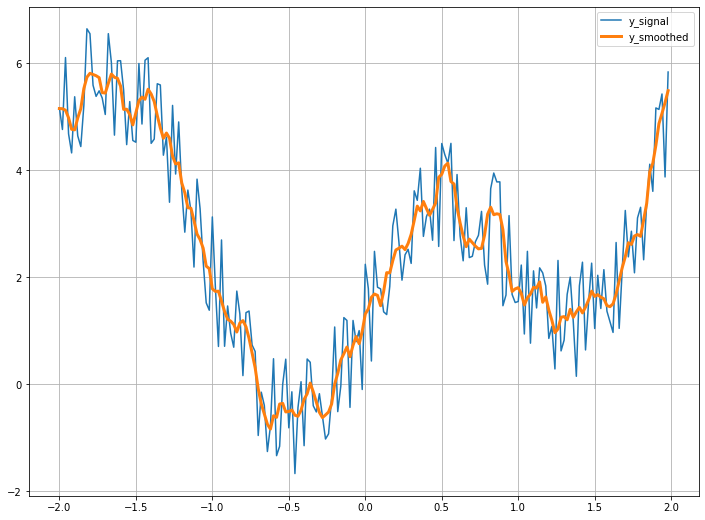

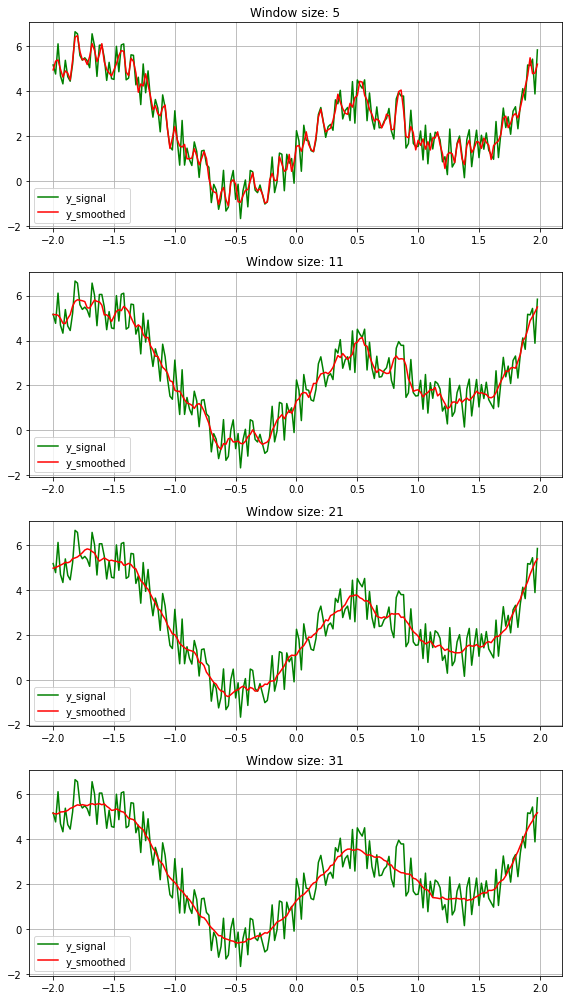

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 

x = np.arange(-2, 2, 0.02)
y = np.array(x**2 + 2*np.sin(x*np.pi)) 
y = y + np.array(np.random.random(len(x))*2.3)
y_smooth = signal.savgol_filter(y, window_length=11, polyorder=3, mode="nearest")

plt.figure(figsize=(12, 9))
plt.plot(x, y, label="y_signal")
plt.plot(x, y_smooth, linewidth=3, label="y_smoothed")
plt.legend()
plt.grid(True)
plt.show()


ig, ax = plt.subplots(4, figsize=(8, 14))
i = 0
 
# define window sizes 5, 11, 21, 31
for w_size in [5, 11, 21, 31]:    
    y_fit = signal.savgol_filter(y, w_size, 3, mode="nearest")
    ax[i].plot(x, y, label="y_signal", color="green")
    ax[i].plot(x, y_fit, label="y_smoothed", color="red")
    ax[i].set_title("Window size: " + str(w_size))
    ax[i].legend()
    ax[i].grid(True)
    i+=1

plt.tight_layout()        
plt.show() 
 

In [5]:
import cv2 
import mediapipe as mp
import numpy as np

filename = "./videos/RayAllen2.mp4"
time = 0
times = []

cap = cv2.VideoCapture(filename)
cap.set(cv2.CAP_PROP_FPS, 60)

while cap.isOpened():      
       
    ret, frame = cap.read()  
    if not ret:
        cap.release()
        break     
    times.append(time)
    time+=1
    
cap.release()
cv2.destroyAllWindows()    
print(f"filename: {len(times)}")


filename: 76


stopped bouncing at t=7.762



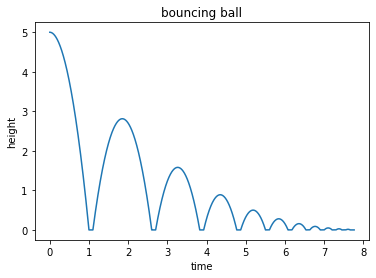

In [1]:
from math import sqrt
import matplotlib.pyplot as plt

h0 = 5         # m/s
v = 0          # m/s, current velocity
g = 10         # m/s/s
t = 0          # starting time
dt = 0.001     # time step
rho = 0.75     # coefficient of restitution
tau = 0.10     # contact time for bounce
hmax = h0      # keep track of the maximum height
h = h0
hstop = 0.01   # stop when bounce is less than 1 cm
freefall = True # state: freefall or in contact
t_last = -sqrt(2*h0/g) # time we would have launched to get to h0 at t=0
vmax = sqrt(2 * hmax * g)
H = []
T = []
while(hmax > hstop):
  if(freefall):
    hnew = h + v*dt - 0.5*g*dt*dt
    if(hnew<0):
      t = t_last + 2*sqrt(2*hmax/g)
      freefall = False
      t_last = t + tau
      h = 0
    else:
      t = t + dt
      v = v - g*dt
      h = hnew
  else:
    t = t + tau
    vmax = vmax * rho
    v = vmax
    freefall = True
    h = 0
  hmax = 0.5*vmax*vmax/g
  H.append(h)
  T.append(t)

plt.figure()
plt.plot(T, H)
plt.xlabel('time')
plt.ylabel('height')
plt.title('bouncing ball')

print("stopped bouncing at t=%.3f\n"%(t))


In [27]:
path = './data'
filenames = os.listdir(path)

for file in filenames:
    content = np.loadtxt('./data/'+file)
    
print(content)


[[150.60778506 155.2329482  154.71818294 151.31816988 146.63680113
  141.76344957 137.38986896 133.90913393 131.49802894 130.18429547
  129.90014644 130.52345707 131.90804121 133.9044224  136.37250868
  140.81137719 146.78430733 145.08900743 145.77962246 151.40640459
  157.74110274 163.77056326 166.78579051 167.94194835 166.72473664
  163.04281315 157.330165   151.36377085 147.38954303 138.04292072
  133.65565772 134.76505602 141.17732723 149.77240136 158.08018076
  166.46328526 173.07812461 176.09644142 175.85520501 172.17619858
  164.98209833 154.72073286 144.40777402 136.12816889 132.63965778
  133.68538304 137.89163019 143.98830671 150.76091854 157.07770137
  162.08548665 165.35847754 166.97529758 167.49967515 167.84012649
  168.96400029 171.44124665 174.79327345 176.62225286 171.49624108]
 [139.34076483 144.72961965 141.79340652 137.2687392  134.70571185
  135.42412678 139.29590572 145.36863256 152.34517558 158.93433712
  164.08747876 167.13606993 167.84510803 166.39735793 163.323